<a href="https://colab.research.google.com/github/ivnlee/tec-mna-nlp/blob/main/semana-10/Equipo13_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformer GPT y Web-Scraping

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

De la siguiente liga de Tripadvisor selecciona un hotel en la zona de la ciudad de Monterrey, México, que consideres adecuado para extraer los comentarios de español y evaluaciones de usuarios:

https://www.tripadvisor.es/Hotels-g150782-Monterrey_Northern_Mexico-Hotels.html

### 1. Mediante web scraping realiza una extracción de los comentarios y calificaciones a dicho hotel. Recuerda que Tripadvisor representa las calificaciones mediante círculos verdes. Los comentarios deben ser de usuarios que los redactaron en idioma en español. Indica la cantidad de comentarios y sus calificaciones que extrajiste.

In [14]:
url = "https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html"

html = requests.get(url,
                    headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
                    )

print(html.status_code)

200


In [15]:
links = []

max_or_num = 1960  # 1964 reseñas en español.

reviews_x_pages = 5    # 5 reseñas por pagina

for k in range(0, max_or_num, reviews_x_pages):
  a = url
  if k == 0:
    ss = '{}'     # Para la primera página es el -or con valor vacío.
  else:
    ss = str(k)  # convertimos a string el valor numérico.
  a = a[:(a.find('Reviews')+7)] + '-or' + ss + a[(a.find('Reviews')+7):]  # Los índices de "Reviews" van de 0 a 6, ya que tiene 7 letras.
  links.append(a)

# Imprimimos los primeros 10
links[0:10]

['https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or{}-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or5-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or10-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or15-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or20-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or25-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or30-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-

In [16]:
from random import randint
from time import sleep
import re

In [ ]:
reviews = []
stars = []

numpages = int( max_or_num / reviews_x_pages )

for link in links[0:numpages]:

  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)

  sleep(randint(1,5))

  # objeto de la librería BeautifulSoup para llevar a cabo nuestra tarea
  bsobj2 = soup(html2.content,'lxml')

  for review in bsobj2.findAll('span', {'class' : 'QewHA'}):
      reviews.append(review.text.strip())

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

  # Extraigamos también las calificaciones (estrellas):
  for cal in bsobj3.findAll('div', {'class' : 'Hlmiy'}):
    # Extraemos solo la calificacion (en este caso: 10, 20, 30, 40 o 50)
    cal = re.findall(r'\d{2}', ' '.join(str(x) for x in cal))

    stars.append(cal)

In [ ]:
# Imprimimos los primeros 3 comentrios y su calificación
for i in range(3):
   print(reviews[i])
   print(stars[i])

Estuve en el IStay Monterrey para el festival P´al Norte, la habitación durante esos días estaba en casi 5000 pesos la noche, por lo que se esperaría al menos un lugar digno para descansar. El lobby no tiene buen aspecto y el acceso es por un estacionamiento, la alfombra del piso del piso en el que estaba mi habitación por alguna razón se inundó y apestaba desde la  escalera hasta el cuarto a humedad terrible.  Los colchones de las camas están aguados y terribles y las sábanas se sienten viejas.  Las almohadas delgadas e  incómodas. Al baño le hace falta mantenimiento, pero estaba limpio.  El personal del lobby muy amable y ágil, excelente servicio ahí.  La ubicación es buena, pues está muy conectado y en el centro de la ciudad. sin embargo la calle lateral se percibe insegura.
['20']
Las habitaciones están algo descuidadas, no como muestra en la foto donde se ven mejor. La lámpara del techo estaba sucia y con muchos insectos muertos. El sistema de salida de agua de la regadera-tina de

**Cantidad de comentarios y calificaciones extraídas:**

In [19]:
print('Cantidad de comentarios:', len(reviews), '\nCantidad de calificaciones:', len(stars))

Cantidad de comentarios: 1960 
Cantidad de calificaciones: 1960


### 2. Para considerarlo como un problema binario, convierte las calificaciones a valores de 0 (comentario negativo) y 1 (comentario positivo).

In [ ]:
df_review = pd.DataFrame(reviews, columns=['review'])
df_stars = pd.DataFrame(stars, columns=['stars'])

df = pd.concat([df_review, df_stars], axis=1)
df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,20
1,"Las habitaciones están algo descuidadas, no co...",30
2,le falta mucho mantenimiento ya es un hotel vi...,20
3,Hice la reservación pero no me quedé ya que en...,30
4,"Un hotel muy limpio, seguro y tranquilo además...",50


###**a.** En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por ejemplo. Justifica la decisión tomada.

In [ ]:
for i in range(len(df['stars'])):
  if int(df['stars'][i]) >= 40:
    df['stars'][i] = 1
  else:
    df['stars'][i] = 0

df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,0
1,"Las habitaciones están algo descuidadas, no co...",0
2,le falta mucho mantenimiento ya es un hotel vi...,0
3,Hice la reservación pero no me quedé ya que en...,0
4,"Un hotel muy limpio, seguro y tranquilo además...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1960 non-null   object
 1   stars   1960 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [ ]:
# Guardamos dtaframe como CSV para utilizarlo posteriormente
##
#df.to_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv')

###**b.** Indica la proporción de comentarios positivos y negativos que tienes ahora.

<Axes: title={'center': 'Distribución de Clases'}, ylabel='Frequency'>

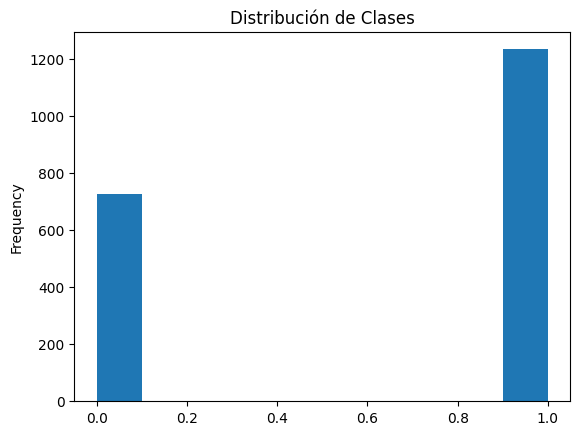

In [11]:
df = pd.read_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv', index_col=0)

df['stars'].plot(kind='hist', title='Distribución de Clases')